About dataset
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

In [82]:
%matplotlib tk
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from mpl_toolkits.mplot3d import Axes3D
# import mpl_toolkits.mplot3d.axes3d as p3
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [83]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [84]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [86]:
trans = make_column_transformer((StandardScaler(),['median_house_value']),(OneHotEncoder(),['ocean_proximity']))
dataset = pd.DataFrame(trans.fit_transform(df))
dataset

,0,1,2,3,4,5
0,2.129631,0.0,0.0,0.0,1.0,0.0
1,1.314156,0.0,0.0,0.0,1.0,0.0
2,1.258693,0.0,0.0,0.0,1.0,0.0
3,1.165100,0.0,0.0,0.0,1.0,0.0
4,1.172900,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
20635,-1.115804,0.0,1.0,0.0,0.0,0.0
20636,-1.124470,0.0,1.0,0.0,0.0,0.0
20637,-0.992746,0.0,1.0,0.0,0.0,0.0
20638,-1.058608,0.0,1.0,0.0,0.0,0.0


In [98]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Cluster
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.082749
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.073183
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.088103
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.117075
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.041542
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.030425
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.056471
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.548848
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,-0.824070
Cluster,0.082749,0.073183,-0.088103,-0.117075,-0.041542,0.030425,-0.056471,-0.548848,-0.824070,1.000000


In [87]:
X = df.loc[:, ["median_income", "latitude", "longitude"]]
X.head()


,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


Since k-means clustering is sensitive to scale, it can be a good idea rescale or normalize data with extreme values. Our features are already roughly on the same scale, so we'll leave them as-is.

## Elbow Method
##### Find optimum number of cluster

In [88]:
sse = [] #SUM OF SQUARED ERROR
for k in range(1,21):
    km = KMeans(n_clusters=k, n_init=10)
    
    km.fit(X)
    sse.append(km.inertia_)

<IPython.core.display.Javascript object>


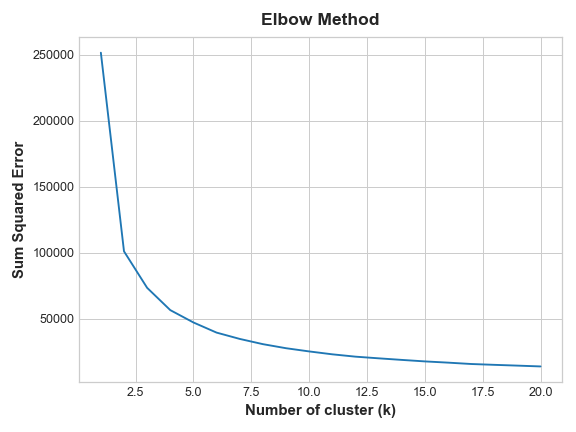

In [89]:
g=sns.lineplot(x=range(1,21), y=sse)

g.set(xlabel ="Number of cluster (k)", ylabel = "Sum Squared Error", title ='Elbow Method')

plt.show()

### Create cluster feature
 n = 2

In [95]:
model = make_pipeline(trans, KMeans(n_clusters=2,n_init=40))
df["Cluster"] = model.fit_predict(df)

In [94]:
kmeans = KMeans(n_clusters=2,n_init=10)

X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,median_income,latitude,longitude,Cluster
0,8.3252,37.88,-122.23,0
1,8.3014,37.86,-122.22,0
2,7.2574,37.85,-122.24,0
3,5.6431,37.85,-122.25,0
4,3.8462,37.85,-122.25,0


Now let's look at a couple plots to see how effective this was. First, a scatter plot that shows the geographic distribution of the clusters. It seems like the algorithm has created separate segments for higher-income areas on the coasts.

In [96]:
# sns.relplot(x="longitude", y="latitude", hue="Cluster", data=df, height=10)
# plt.show()

<IPython.core.display.Javascript object>


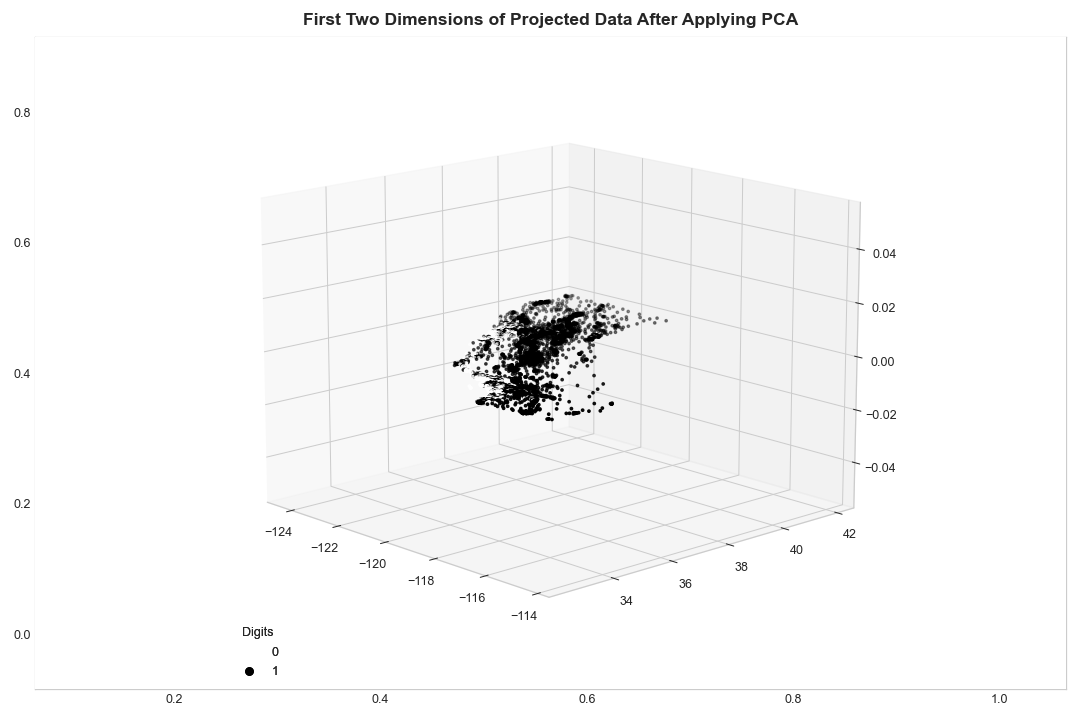

In [97]:
fig, ax = plt.subplots(figsize=(12, 8),)
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(df.longitude, df.latitude, c=df.Cluster, s=4)
legend_plt = ax.legend(*scatter.legend_elements(),
                       loc="lower left", title="Digits")
ax.add_artist(legend_plt)
# ax.view_dk(60, 120)
plt.title('First Two Dimensions of Projected Data After Applying PCA')
plt.show()